In [18]:
# Import libraries for data analysis, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
import joblib
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Load the dataset
df = pd.read_csv('ev.csv')
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [20]:
# Display basic info and check for missing values
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

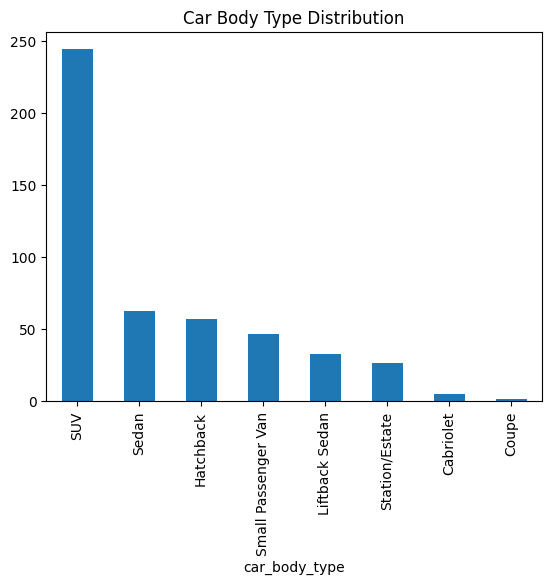

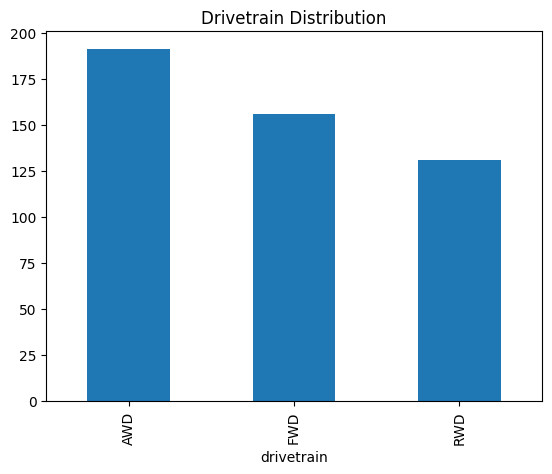

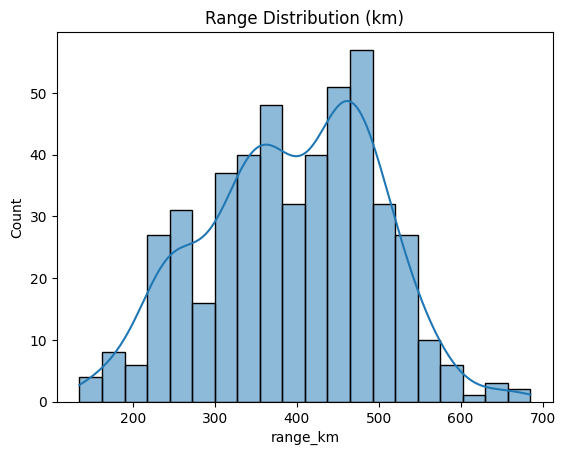

In [21]:
# Visualize key features
df['car_body_type'].value_counts().plot(kind='bar', title='Car Body Type Distribution')
plt.show()
df['drivetrain'].value_counts().plot(kind='bar', title='Drivetrain Distribution')
plt.show()
sns.histplot(df['range_km'], bins=20, kde=True)
plt.title('Range Distribution (km)')
plt.show()

In [22]:
# Fill missing numeric values with median, categorical with mode
def fill_missing(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        df[col] = df[col].fillna(df[col].median())
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    return df

df = fill_missing(df)

# Encode categorical variables
df['car_body_type_enc'] = LabelEncoder().fit_transform(df['car_body_type'])
df['drivetrain_enc'] = LabelEncoder().fit_transform(df['drivetrain'])

# Scale numeric features
scaler = StandardScaler()
numeric_features = ['range_km', 'battery_capacity_kWh', 'acceleration_0_100_s', 'fast_charging_power_kw_dc', 'seats']
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url,car_body_type_enc,drivetrain_enc
0,Abarth,500e Convertible,155,-1.784545,Lithium-ion,192.0,235.0,156,-1.629978,0.043025,...,-1.259931,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...,2,1
1,Abarth,500e Hatchback,155,-1.784545,Lithium-ion,192.0,235.0,149,-1.629978,0.043025,...,-1.259931,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...,2,1
2,Abarth,600e Scorpionissima,200,-1.144460,Lithium-ion,102.0,345.0,158,-1.096925,-0.360225,...,-0.262833,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...,4,1
3,Abarth,600e Turismo,200,-1.144460,Lithium-ion,102.0,345.0,158,-1.096925,-0.250248,...,-0.262833,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...,4,1
4,Aiways,U5,150,-0.691476,Lithium-ion,216.0,310.0,156,-0.757710,0.226320,...,-0.262833,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5,4,1


In [23]:
# Features for recommendation
features = ['range_km', 'battery_capacity_kWh', 'acceleration_0_100_s', 'fast_charging_power_kw_dc', 'seats', 'car_body_type_enc', 'drivetrain_enc']

# KNN Model
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(df[features])

# Cosine Similarity Matrix
cos_sim_matrix = cosine_similarity(df[features])

# Example: Recommend similar vehicles to the first entry
sample_idx = 0
_, knn_indices = knn.kneighbors([df.loc[sample_idx, features]])
print('KNN Recommendations:', df.iloc[knn_indices[0]][['brand', 'model']])

cos_sim_scores = list(enumerate(cos_sim_matrix[sample_idx]))
cos_sim_scores = sorted(cos_sim_scores, key=lambda x: x[1], reverse=True)[1:6]
print('Cosine Similarity Recommendations:', df.iloc[[i[0] for i in cos_sim_scores]][['brand', 'model']])

KNN Recommendations:       brand                  model
1    Abarth         500e Hatchback
0    Abarth       500e Convertible
261    Mini               Cooper E
104    Fiat        500e 3+1 42 kWh
108    Fiat  500e Hatchback 42 kWh
Cosine Similarity Recommendations:       brand                  model
1    Abarth         500e Hatchback
261    Mini               Cooper E
104    Fiat        500e 3+1 42 kWh
108    Fiat  500e Hatchback 42 kWh
262    Mini             Cooper JCW


In [24]:
# For demonstration, we'll just show the top-5 recommendations for a random sample
np.random.seed(42)
sample_idx = np.random.randint(0, len(df))
print('Sample vehicle:', df.iloc[sample_idx][['brand', 'model']])
_, knn_indices = knn.kneighbors([df.loc[sample_idx, features]])
print('KNN Recommendations:', df.iloc[knn_indices[0]][['brand', 'model']])
cos_sim_scores = list(enumerate(cos_sim_matrix[sample_idx]))
cos_sim_scores = sorted(cos_sim_scores, key=lambda x: x[1], reverse=True)[1:6]
print('Cosine Similarity Recommendations:', df.iloc[[i[0] for i in cos_sim_scores]][['brand', 'model']])

Sample vehicle: brand        Elaris
model    BEO 86 kWh
Name: 102, dtype: object
KNN Recommendations:        brand                    model
102   Elaris               BEO 86 kWh
377  Skywell          BE11 Long Range
69       BYD  SEAL U 71.8 kWh Comfort
70       BYD     SEAL U 87 kWh Design
303  Peugeot            e-3008 73 kWh
Cosine Similarity Recommendations:        brand                    model
377  Skywell          BE11 Long Range
69       BYD  SEAL U 71.8 kWh Comfort
70       BYD     SEAL U 87 kWh Design
303  Peugeot            e-3008 73 kWh
292     Opel         Grandland 73 kWh


In [25]:
# Save the KNN model, scaler, and encoders
joblib.dump(knn, 'knn_ev_model.joblib')
joblib.dump(scaler, 'ev_scaler.joblib')
joblib.dump(LabelEncoder().fit(df['car_body_type']), 'car_body_type_encoder.joblib')
joblib.dump(LabelEncoder().fit(df['drivetrain']), 'drivetrain_encoder.joblib')

['drivetrain_encoder.joblib']

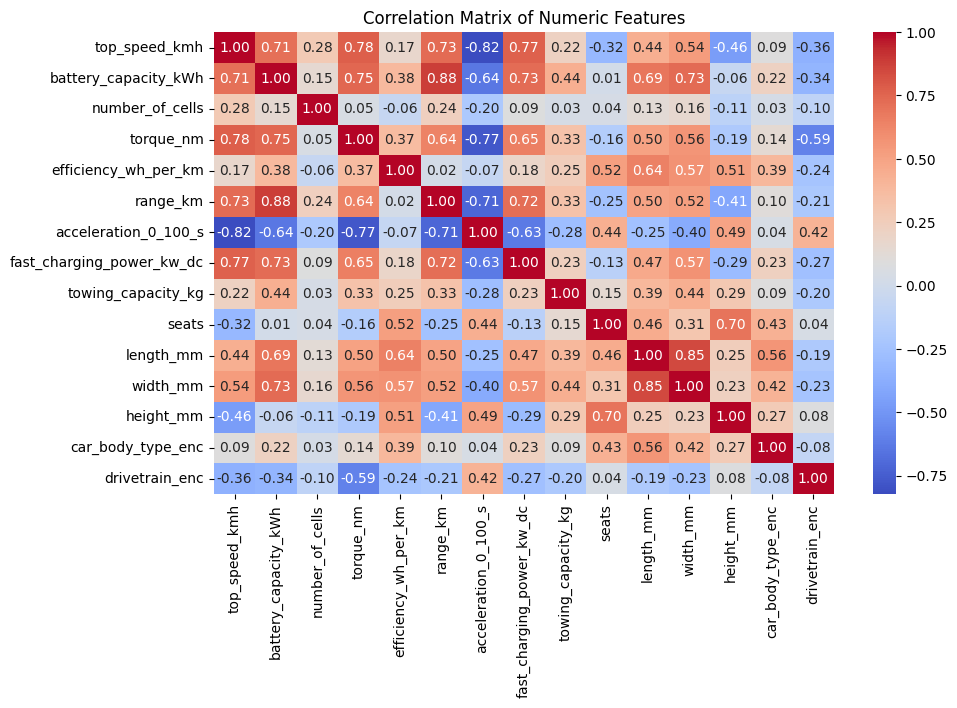

Top features correlated with range_km:
battery_capacity_kWh         0.880433
top_speed_kmh                0.732130
fast_charging_power_kw_dc    0.720123
acceleration_0_100_s         0.712486
torque_nm                    0.636849
width_mm                     0.521392
length_mm                    0.496867
height_mm                    0.413798
towing_capacity_kg           0.329475
seats                        0.248784
Name: range_km, dtype: float64


In [26]:
# Check important features for EV recommendation
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=['number']).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Print top correlated features with range_km (target for recommendation)
corr_target = corr['range_km'].drop('range_km').abs().sort_values(ascending=False)
print('Top features correlated with range_km:')
print(corr_target.head(10))

In [27]:
# NOTE: Production app.py uses hard filtering for categorical features
# In the Flask app, 'car_body_type' and 'drivetrain' are filtered using Pandas before KNN.
# Only numeric features are used for KNN similarity (see FEATURES in app.py):
# ['range_km', 'efficiency_km_per_kWh', 'fast_charging_power_kw_dc',
#  'price_per_km', 'acceleration_0_100_s', 'seats']
# This means the user will never see a Sedan if they select SUV, regardless of KNN score.
# In this notebook, you may see LabelEncoder or encoded categorical features in KNN,
# but the deployed app uses hard filtering for a better user experience.